In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle

In [33]:
# Load the data
data = pd.read_csv("Train_data.csv")  # Replace with your file path

In [34]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938         

In [35]:
# Display the shape of the dataset
print("\nShape of the dataset:", data.shape)


Shape of the dataset: (2351, 25)


In [36]:
# Display data types and missing values
print("\nData types and missing values:")
print(data.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float

In [37]:
# Summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
           Glucose  Cholesterol   Hemoglobin    Platelets  White Blood Cells  \
count  2351.000000  2351.000000  2351.000000  2351.000000        2351.000000   
mean      0.362828     0.393648     0.586190     0.504027           0.511086   
std       0.251889     0.239449     0.271498     0.303347           0.277270   
min       0.010994     0.012139     0.003021     0.012594           0.010139   
25%       0.129198     0.195818     0.346092     0.200865           0.259467   
50%       0.351722     0.397083     0.609836     0.533962           0.527381   
75%       0.582278     0.582178     0.791215     0.754841           0.743164   
max       0.968460     0.905026     0.983306     0.999393           0.990786   

       Red Blood Cells   Hematocrit  Mean Corpuscular Volume  \
count      2351.000000  2351.000000              2351.000000   
mean          0.506590     0.507152                 0.492200   
std           0.266565     0.285537                 0.275735   
mi

In [39]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [43]:
# Split the data into features and target variable
X = data.drop('Disease', axis=1)  # Replace 'target_column' with your actual target column name
y = data['Disease']

In [44]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [45]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [46]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [47]:
# Feature selection
selector = SelectKBest(score_func=f_classif, k=10)  # Adjust 'k' as needed
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test)


In [48]:
# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
                            param_grid=param_grid,
                            scoring='accuracy',
                            cv=3,
                            n_jobs=-1)

In [49]:
# Fit the model with the best parameters
grid_search.fit(X_train_selected, y_train_resampled)

e:\nisha projects\disease prediction web app\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:14:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [50]:
# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}


In [51]:
# Evaluate the model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_selected, y_test)
print("Test accuracy: ", test_accuracy)

Test accuracy:  1.0


In [54]:
# Predict on test data
y_pred = best_model.predict(X_test_selected)

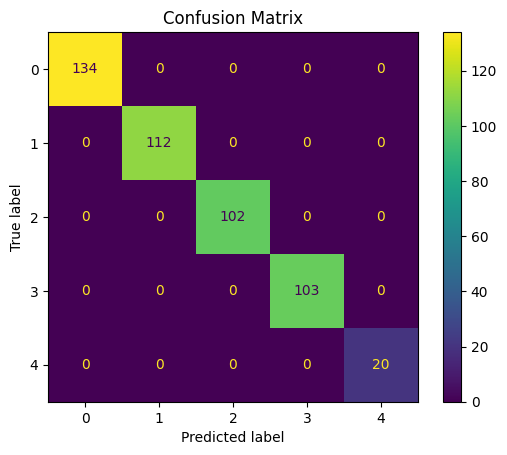

In [56]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [57]:
# Classification Report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       112
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00       103
           4       1.00      1.00      1.00        20

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471



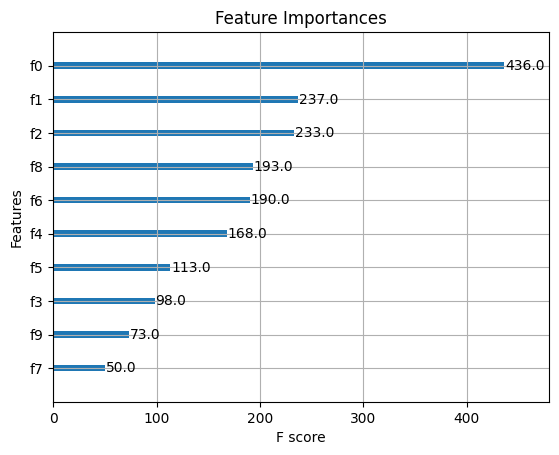

In [58]:
# Feature Importances
import xgboost as xgb
xgb.plot_importance(best_model)
plt.title('Feature Importances')
plt.show()

In [59]:
# Save the model and scaler
with open("disease_prediction_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

In [60]:
# Save the best model and the label encoder
import joblib
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'disease_prediction_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Model and Label Encoder saved successfully!")


Model and Label Encoder saved successfully!


In [61]:
print("Feature shape: ", X.shape)


Feature shape:  (2351, 24)
